# Music Genre Classification
##### By: Akhil Kammell, Matthew Lischin

## Introduction

At some point or another, almost every human being has interacted with music to some capacity, and technology has bolstered the scale of this interaction and the way that we percieve music. Whether it be through DJing software such as Rekordbox & Serato, streaming services like Spotify and Apple Music, or Digital Audio Workspaces like Ableton and Praat, these days we have easy access to applications that perform music analysis. In this tutorial we aim to recreate the process of genre classification akin to those found in the afformentioned applications.

## Hypothesis

In this tutorial we will create a SVC Classifier using all of the given features provided by the GTZAN Dataset. Simultaneously we will examine the importance of individual features when making a classifier through analyzing the accuracy and precision of different classifiers which focus on either a single feature, or a reestricted amount. We will be comparing the accuracy and precision scores of these classifiers to discover if having more features can impact the accuracy of a genre-detecting classifier.

## Data Curation, Parsing, and Management

In order to begin our quest at music genre classification, we found a large dataset by Andrada Olreanu called "GTZAN Dataset." The set contains 1,000 songs. There are 100 songs from each of 10 genres (blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock) and each song is clipped into just a 30-second piece. Along with the .wav files for each song, the file includes a spectrogram image from the 30-second clip, and 2 csv files. The first is titled features_30_sec.csv and contains mean and variance readings from the entire 30-second clip. The second is titled features_3_sec.csv. This one contains all the same readings, but instead of 1 per song, there is 10. Means and variances are taken within every three-second section of the 30-second file.

The Dataset can be found here: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

#tbl3 denotes the csv where each 30 second clip is broken into 3 10 second clips
tbl3 = pd.read_csv("features3.csv")

#displaying first 5 rows of tbl3
tbl3.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [2]:
list(tbl3.columns)
# here we can see all of the data provided by the two tables

['filename',
 'length',
 'chroma_stft_mean',
 'chroma_stft_var',
 'rms_mean',
 'rms_var',
 'spectral_centroid_mean',
 'spectral_centroid_var',
 'spectral_bandwidth_mean',
 'spectral_bandwidth_var',
 'rolloff_mean',
 'rolloff_var',
 'zero_crossing_rate_mean',
 'zero_crossing_rate_var',
 'harmony_mean',
 'harmony_var',
 'perceptr_mean',
 'perceptr_var',
 'tempo',
 'mfcc1_mean',
 'mfcc1_var',
 'mfcc2_mean',
 'mfcc2_var',
 'mfcc3_mean',
 'mfcc3_var',
 'mfcc4_mean',
 'mfcc4_var',
 'mfcc5_mean',
 'mfcc5_var',
 'mfcc6_mean',
 'mfcc6_var',
 'mfcc7_mean',
 'mfcc7_var',
 'mfcc8_mean',
 'mfcc8_var',
 'mfcc9_mean',
 'mfcc9_var',
 'mfcc10_mean',
 'mfcc10_var',
 'mfcc11_mean',
 'mfcc11_var',
 'mfcc12_mean',
 'mfcc12_var',
 'mfcc13_mean',
 'mfcc13_var',
 'mfcc14_mean',
 'mfcc14_var',
 'mfcc15_mean',
 'mfcc15_var',
 'mfcc16_mean',
 'mfcc16_var',
 'mfcc17_mean',
 'mfcc17_var',
 'mfcc18_mean',
 'mfcc18_var',
 'mfcc19_mean',
 'mfcc19_var',
 'mfcc20_mean',
 'mfcc20_var',
 'label']

## Data Wrangling

The dataset contains a lot of columns which each represent a different feature of a song through its spectrogram. Admittedly, we do not understand what all of the columns mean, nor is there proper documentation associated with the datset to show us. However, we assume that we need as much data as possible to run our Support Vector Machine Classifier. We will be maintaining a DataFrame titled "full_table" which has every column given, but we will also be separating just a few columns (the ones that we understand their importance the most) in order to compare them.

In [3]:
full_table = tbl3
tbl3 = tbl3[['label','filename','tempo','spectral_centroid_mean','spectral_centroid_var','harmony_mean','harmony_var']]

tbl3.head()

,label,filename,tempo,spectral_centroid_mean,spectral_centroid_var,harmony_mean,harmony_var
0,blues,blues.00000.0.wav,129.199219,1773.065032,167541.630869,-0.000078,0.008354
1,blues,blues.00000.1.wav,123.046875,1816.693777,90525.690866,-0.000099,0.004950
2,blues,blues.00000.2.wav,123.046875,1788.539719,111407.437613,-0.000066,0.012476
3,blues,blues.00000.3.wav,123.046875,1655.289045,111952.284517,-0.000014,0.008318
4,blues,blues.00000.4.wav,123.046875,1630.656199,79667.267654,0.000041,0.009634


This simplified version of the table allows us to perform analyses on the individual features that we assume to be the most important for classification of genre purely based on their nature.
 
### The three most important feature types we will look at are:

Spectral Centroid: The Spectral Centroid allows us to know the "center of mass" for the .wav file (basically where the majority of the data points on the file's spectrogram would show up) and is calculated as a weighted mean of the frequencies in the song.

Tempo: the beats per minute of the .wav file.

Harmony: The harmony of a song at a given timestamp is the range of frequencies that can be heard at once.


## Exploratory Data Analysis

Lets examine the coorelation between genre and the features of the music that are provided by the table.

Text(0, 0.5, 'Tempo')

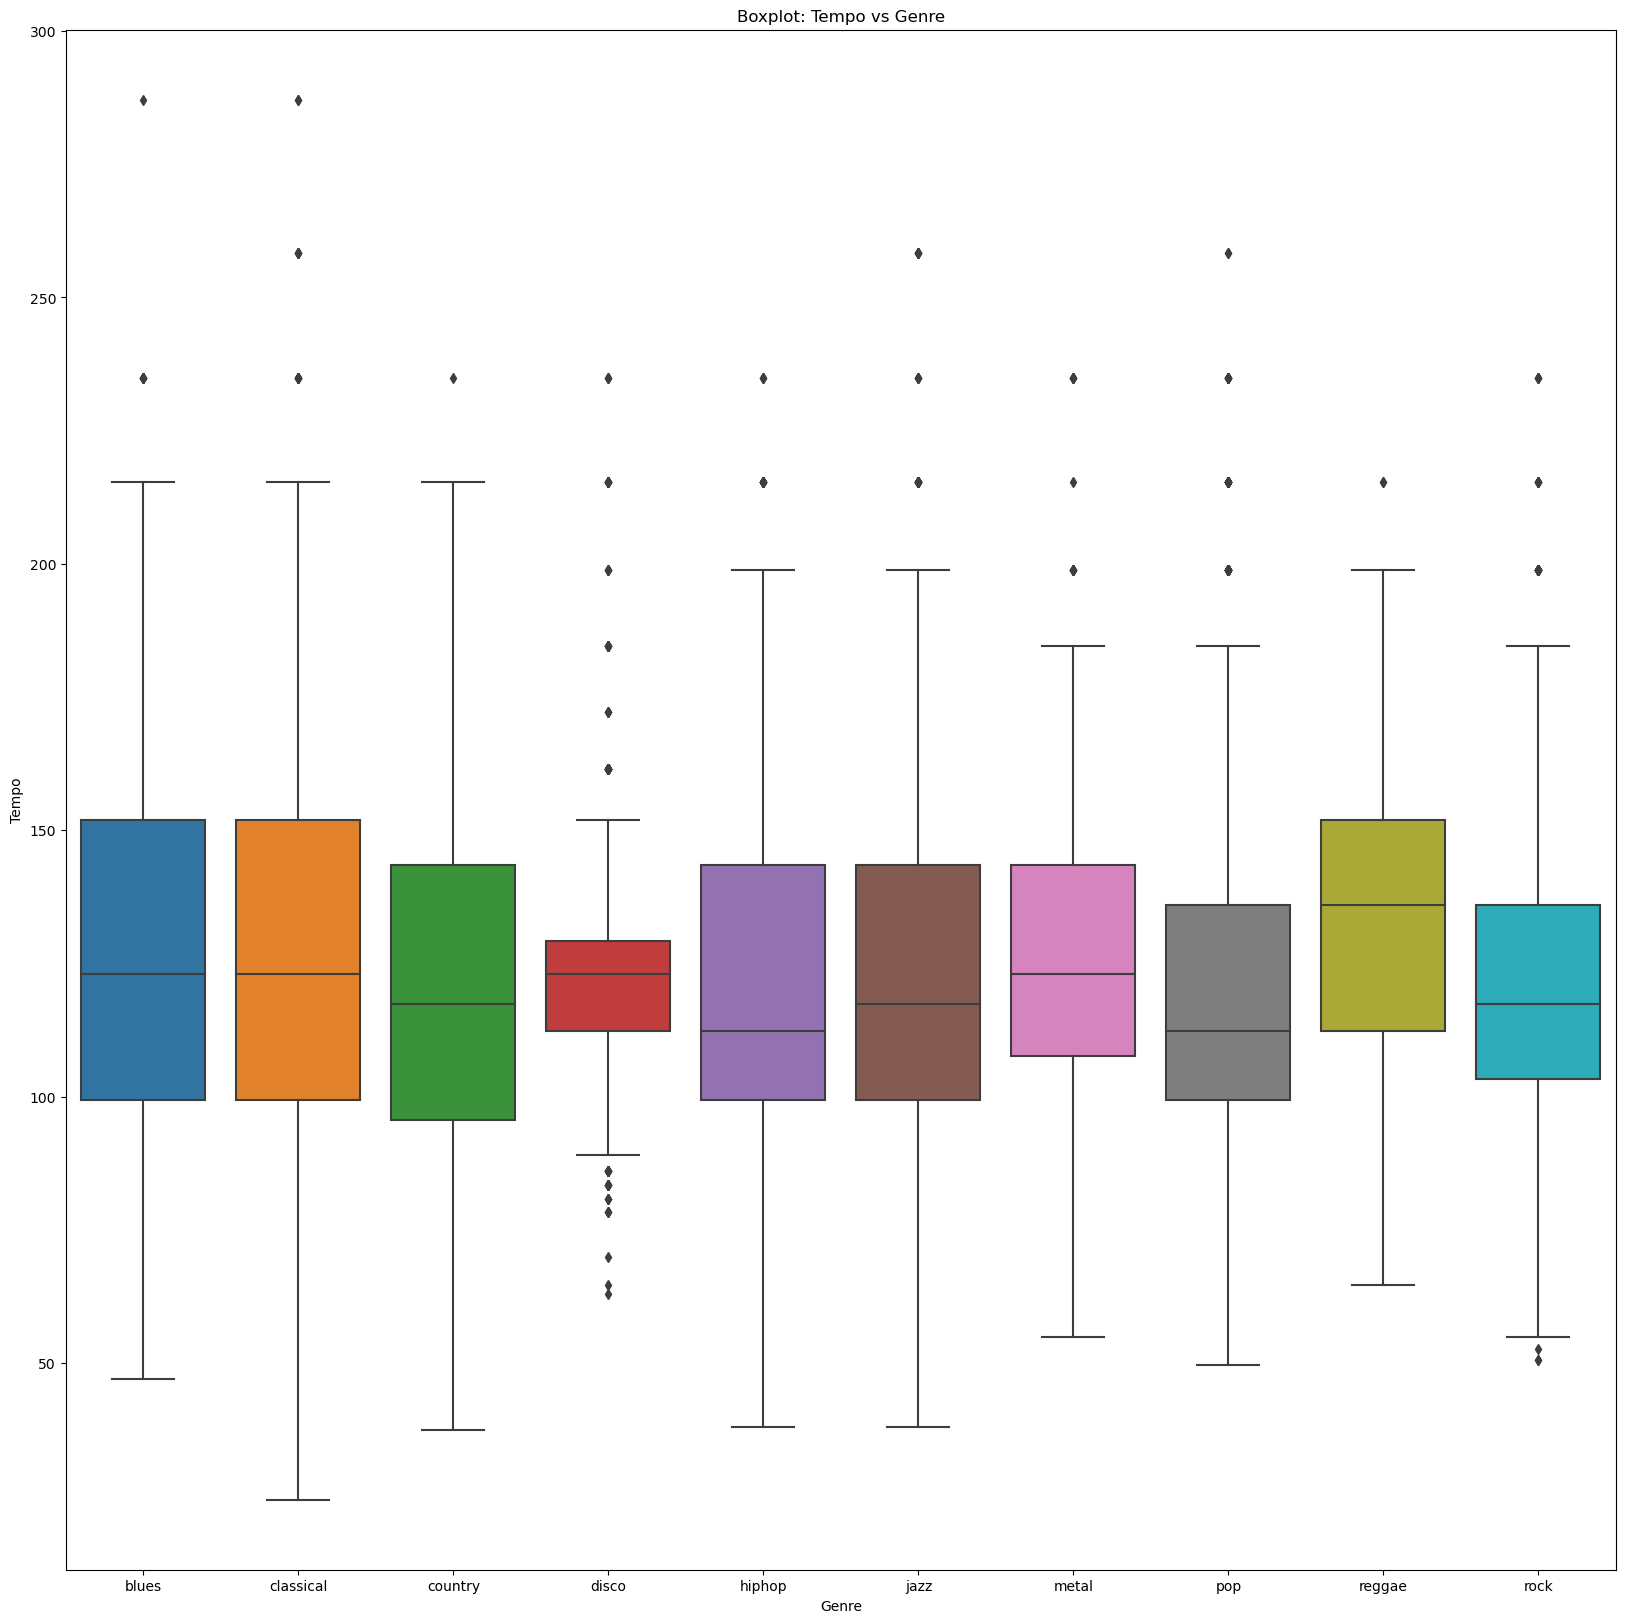

In [4]:
tempo = tbl3[['label','tempo']]
sc = tbl3[['label','spectral_centroid_mean']]
har = tbl3[['label','harmony_mean']]

graph, axis = plt.subplots(figsize=(20,20))
sns.boxplot(x = 'label', y = 'tempo', data = tempo)

plt.title('Boxplot: Tempo vs Genre')
plt.xlabel('Genre')
plt.ylabel('Tempo')

Text(0, 0.5, 'Spectral Centroid Mean')

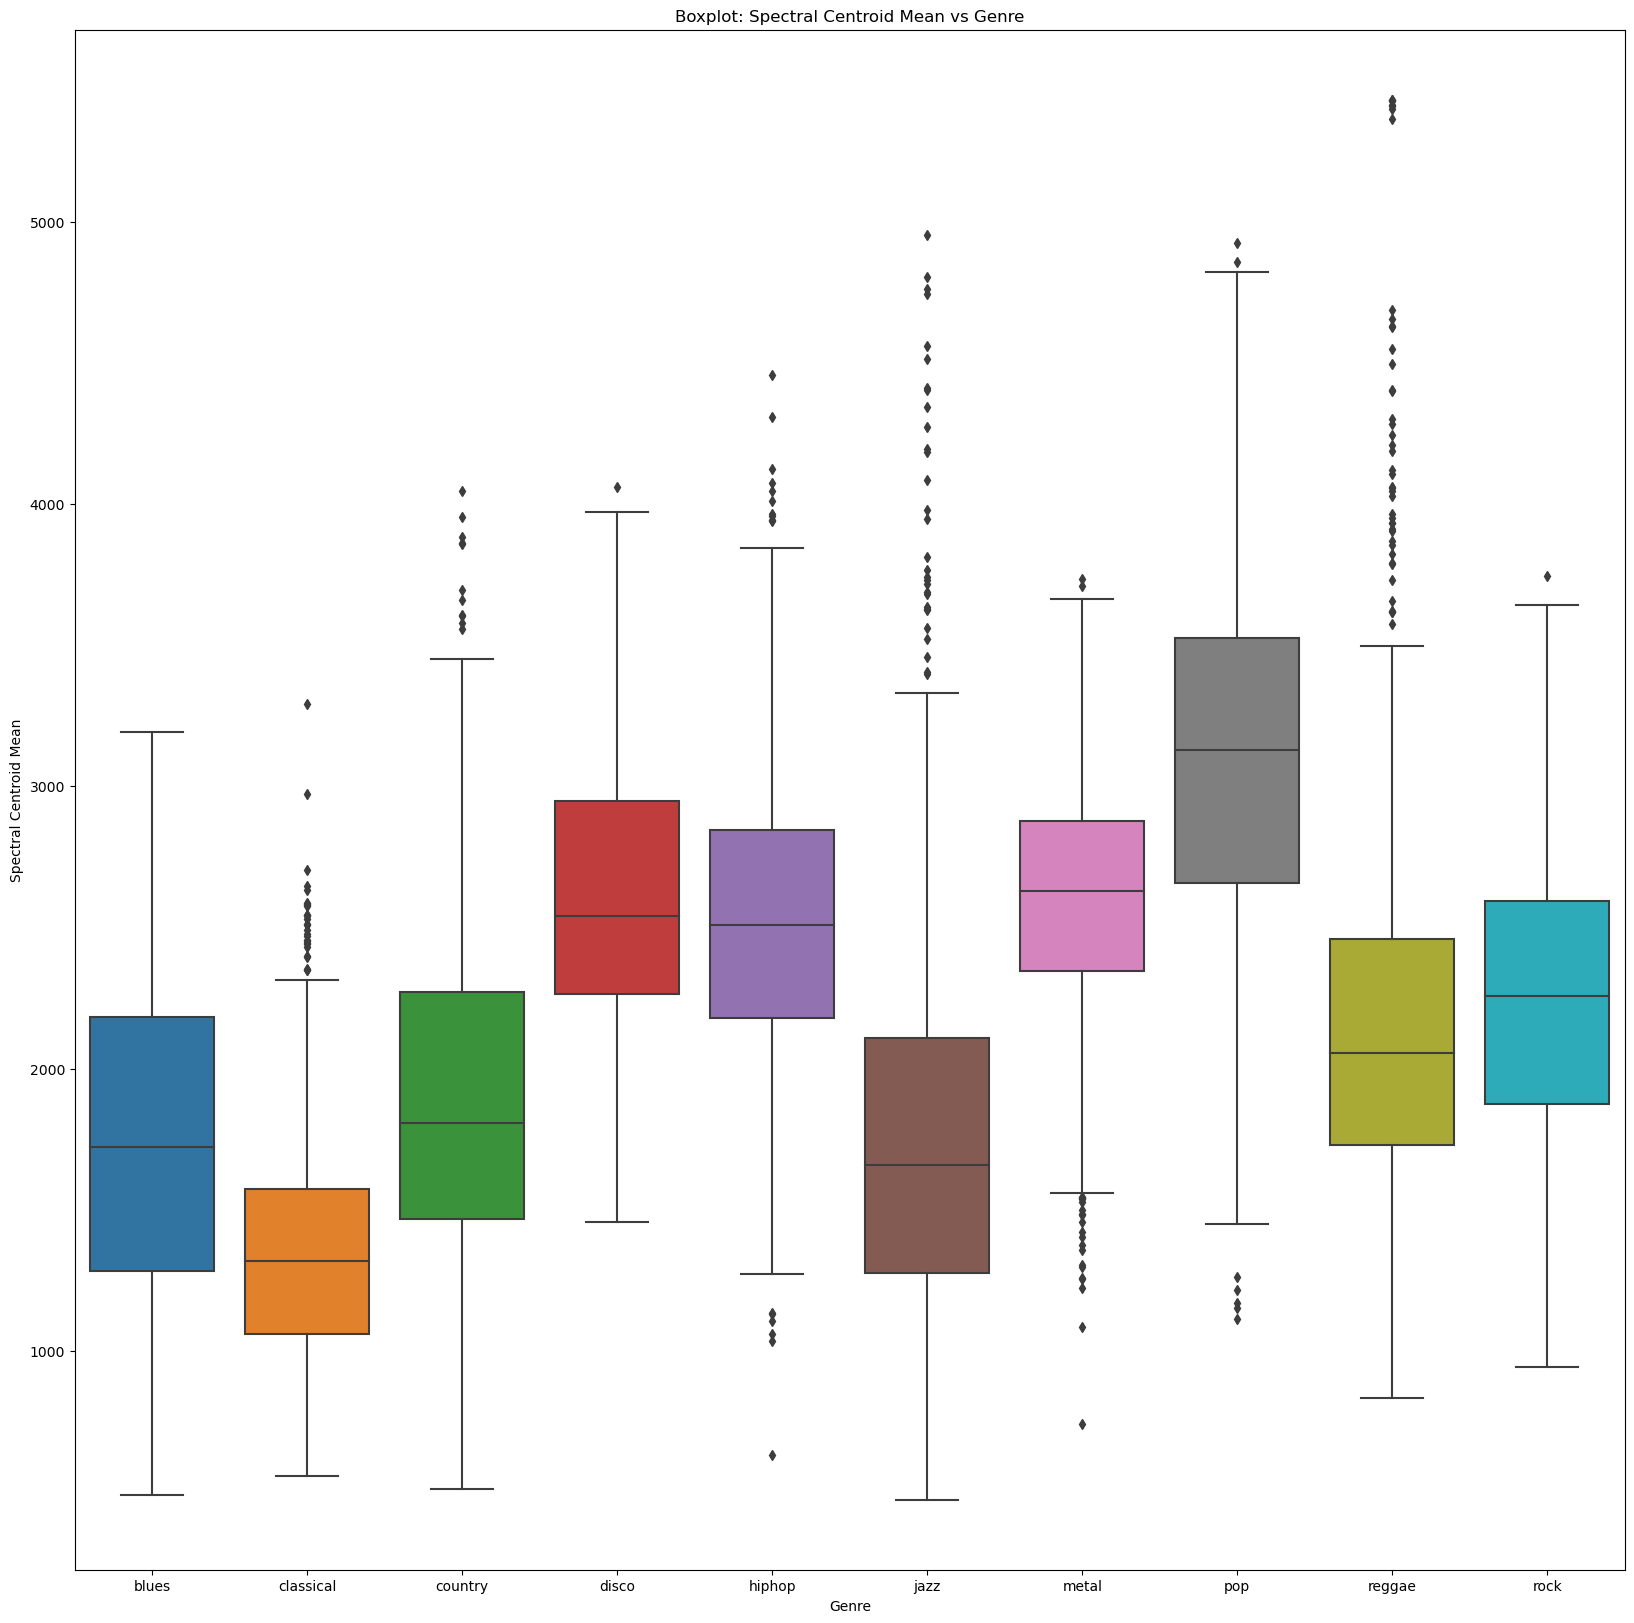

In [5]:
graph, axis = plt.subplots(figsize=(20,20))
sns.boxplot(x = 'label', y = 'spectral_centroid_mean', data = sc)

plt.title('Boxplot: Spectral Centroid Mean vs Genre')
plt.xlabel('Genre')
plt.ylabel('Spectral Centroid Mean')

Text(0, 0.5, 'Mean Harmony')

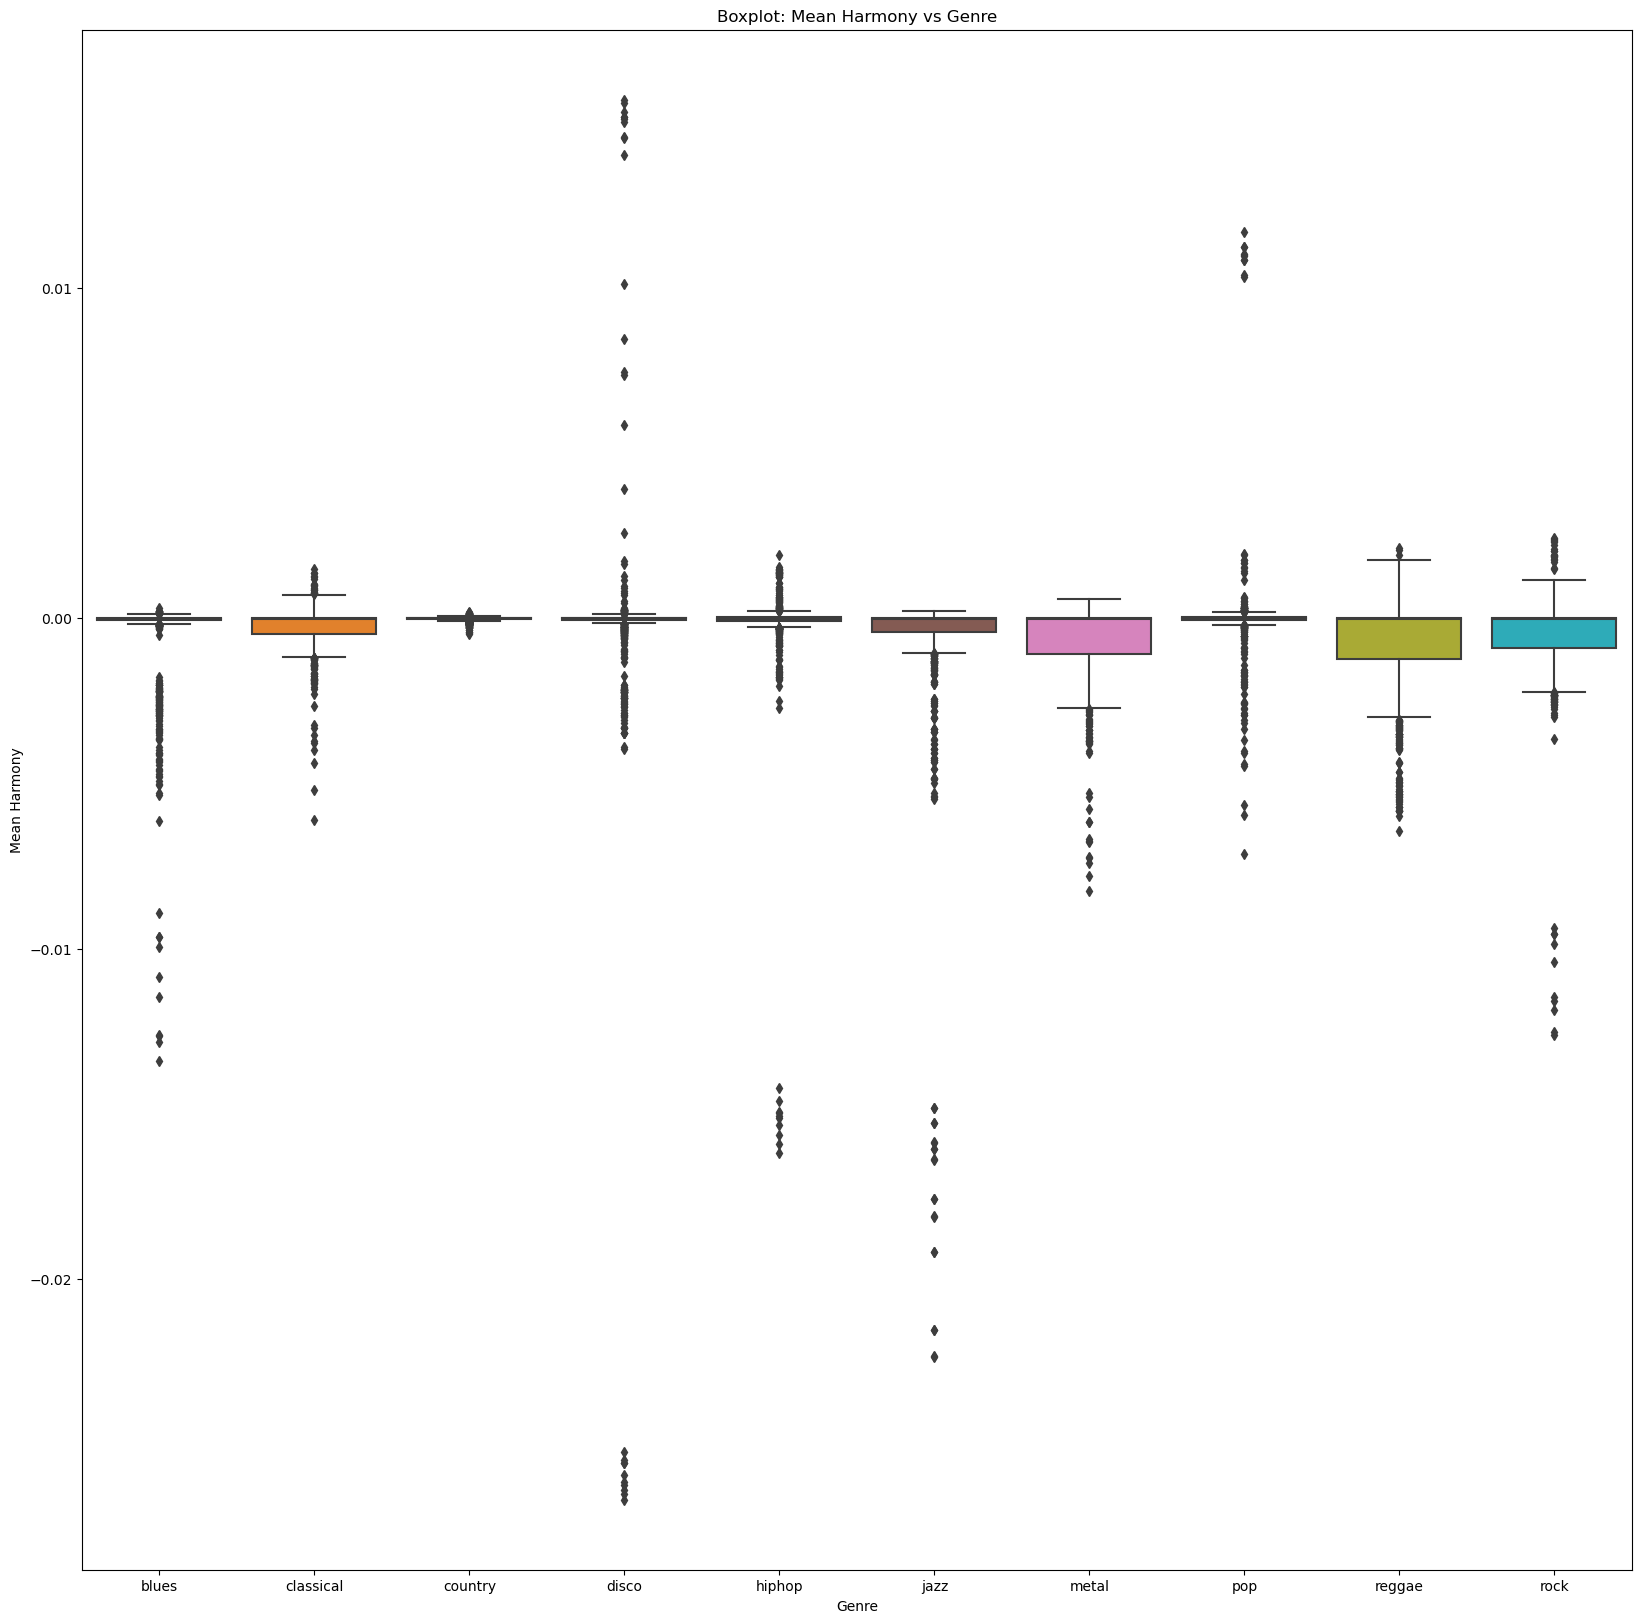

In [6]:
graph, axis = plt.subplots(figsize=(20,20))
sns.boxplot(x = 'label', y = 'harmony_mean', data = har)

plt.title('Boxplot: Mean Harmony vs Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Harmony')

## Data Analysis Conclusion

The motivation for creating and analyzing the boxplots is to estimate what feature would be best used in the creation of our individual/restricted classification models. Looking at Tempo vs. Genre, Spectral Centroid Mean vs. Genre, and Harmony vs. Genre, we found that Spectral Centroid Mean more clearly shows the differences between each genre.

Given this information, moving into the classification portion of the tutorial, we will use the Spectral Centroid Mean data to train & test our individual classifier. It will be put up against a restricted classifier trained on Spectral Centroid Mean and Variance, Harmony Mean and Variance, and tempo as well as a fully-stacked classfier that uses the entire dataset. 

# Step: Classification

## Preprocessing

In [7]:
from sklearn import preprocessing

# convert labels to normalized integers
lb_encoder = preprocessing.LabelEncoder()
tbl3['label'] = lb_encoder.fit_transform(tbl3['label'])

#seperate and normalize independent/dependent vars

just_spectral = tbl3.drop(['label','filename','harmony_mean','harmony_var','tempo','spectral_centroid_var'],axis=1)
columns = just_spectral.columns
mmscaler = preprocessing.MinMaxScaler()
npscaler = mmscaler.fit_transform(just_spectral)
#create a new data frame with our scaled variables
just_spectral = pd.DataFrame(npscaler, columns = columns)


spec_harm = tbl3.drop(['label','filename'],axis=1)
columns = spec_harm.columns
mmscaler = preprocessing.MinMaxScaler()
npscaler = mmscaler.fit_transform(spec_harm)
#create a new data frame with our scaled variables
spec_harm = pd.DataFrame(npscaler, columns = columns)


full = full_table.drop(['label','filename'],axis=1)
columns = full.columns
mmscaler = preprocessing.MinMaxScaler()
npscaler = mmscaler.fit_transform(full)
#create a new data frame with our scaled variables
full = pd.DataFrame(npscaler, columns = columns)

y = tbl3['label']

C:\Users\ak9va\AppData\Local\Temp\ipykernel_24460\3465288436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbl3['label'] = lb_encoder.fit_transform(tbl3['label'])


## Training & building the model

In [8]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(just_spectral, y, test_size = 0.3, random_state=999)
X_train2, X_test2, y_train2, y_test2 = train_test_split(spec_harm, y, test_size = 0.3, random_state=999)
X_train3, X_test3, y_train3, y_test3 = train_test_split(full, y, test_size = 0.3, random_state=999)

In [9]:
classifier1 = SVC(decision_function_shape='ovo').fit(X_train1, y_train1)
classifier2 = SVC(decision_function_shape='ovo').fit(X_train2, y_train2)
classifier3 = SVC(decision_function_shape='ovo').fit(X_train3, y_train3)
classifier3 = SVC(decision_function_shape='ovo').fit(X_train3, y_train3)

In [10]:
classifier_predictions1 = classifier1.predict(X_test1)
print("Spectral Centroid Mean SVC Accuracy Score in percent:")
print(accuracy_score(y_test1, classifier_predictions1)*100)
# 10-fold cross validation is performed
pred1 = cross_val_predict(classifier1, just_spectral, y, cv=10)
print("Spectral Centroid Mean SVC Precision Score:")
print(precision_score(y, pred1, average='macro')*100)
print("")

classifier_predictions2 = classifier2.predict(X_test2)
print("Restricted SVC Accuracy Score in percent:")
print(accuracy_score(y_test2, classifier_predictions2)*100)
# 10-fold cross validation is performed
pred2 = cross_val_predict(classifier2, spec_harm, y, cv=10)
print("Restricted SVC Precision Score:")
print(precision_score(y, pred2, average='macro')*100)
print("")

classifier_predictions3 = classifier3.predict(X_test3)
print("Complete SVC Accuracy Score in percent:")
print(accuracy_score(y_test3, classifier_predictions3)*100)
# 10-fold cross validation is performed
pred3 = cross_val_predict(classifier3, full, y, cv=10)
print("Complete SVC Precision Score:")
print(precision_score(y, pred3, average='macro')*100)

Spectral Centroid Mean SVC Accuracy Score in percent:
25.025025025025027
Spectral Centroid Mean SVC Precision Score:
16.2161980591482



C:\Users\ak9va\miniconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Restricted SVC Accuracy Score in percent:
41.37470804137471
Restricted SVC Precision Score:
34.46235565608118

Complete SVC Accuracy Score in percent:
73.80714047380714
Complete SVC Precision Score:
60.53314428571237


## Conclusion

In this tutorial we trained three separate SVC Classfiers on different amount of information given by the GTZAN Dataset.

Our first classifier used only Spectral Centroid Mean as the feature of the .wav to train the model. After analyzing boxplots for tempo, harmony, and spectral centroid mean, we hypthesized that spectral centroid mean would provide the most accurate results when being the sole feature for a classifier. 

Secondly, we created a classifier that utilized spectal centroid mean and variance, harmony mean and variance, and tempo as its features. We selected these out of the entire dataset because we thought that they were the most relevant for genre classification.

Finally, our largest classifier used all of the given features from the dataset to train its model.


In the end, we found that giving more features to a classification model is overwhemingly more helpful towards increasing the accuracy and precision scores of the models. Even though we selected the features that we deemed most influential for our individal and restricted classifiers, we found in both cases that having more features makes for a more successful classifier.

Looking at our results through a larger lense, we deduce that when it comes to recommendation system and applications with a music analysis aspect, genre classification is mostly probably performed with the usage of all of the features one can extract from song.